In [1]:
import numpy as np

## Note
**If we add a large number as a boosting reward to the forth element (0.4), the epsilon greedy method outperforms the greedy with a large margin.**

The Ten Armed Testbed design and values are borrowed from the Sutton's book (p.28) as demonstrated in the Figure below.

<img src="images/ten_armed_testbed.jpg" width="750px" height="1500px">

In [2]:
def ten_armed_bandit(lever, k=10):
    mu = [0.2, -0.8, 1.6, 0.4, 1.2, -1.4, -0.1, -1.1, 0.9, -0.5]
    if lever < k and lever >= 0:
        return np.random.normal(mu[lever], 1)
    else:
        raise Exception(f"Number {lever} out of range")

# Bandit Algorithm:
![Bandit Algorithm - Sutton's book (2018), Page 32](images/Bandit_alg.jpeg)

# Here's how we know Q:

<img src="images/Q_value.jpeg" width="500px" height="1000px">

In [3]:
class Bandit_Agent:
    
    def __init__(self):
        self.action_values = np.zeros(10) # Q(a)
        self.counts = np.zeros(10) # N(a)
        self.iteration_number = 0
        self.total_reward = 0
        
    def greedy_update(self):
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = ten_armed_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_update(self, epsilon=0.01):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = ten_armed_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
        
    def obj_print(self):
        print(f"{self.action_values},avg_reward={self.total_reward/self.iteration_number},best_action={self.best_action()}")
        
    def best_action(self):
        return np.max(self.action_values)

In [4]:
a_greedy = Bandit_Agent()
a_epsilon = Bandit_Agent()
a_epsilon_smaller_e = Bandit_Agent()

In [5]:
# One Epoch example
EPOCHS = 1000 # Number of Epochs in every Run
greedy_rewards = np.zeros(EPOCHS)                 # For a_greedy
epsilon_greedy_rewards = np.zeros(EPOCHS)         # For a_epsilon
epsilon_greedy_rewards_smaller = np.zeros(EPOCHS) # For a_epsilon_smaller_e
for i in range(0,EPOCHS):
    greedy_rewards[i] = a_greedy.greedy_update()
    epsilon_greedy_rewards[i] = a_epsilon.epsilon_greedy_update(epsilon=0.1)
    epsilon_greedy_rewards_smaller[i] = a_epsilon_smaller_e.epsilon_greedy_update(epsilon=0.01)

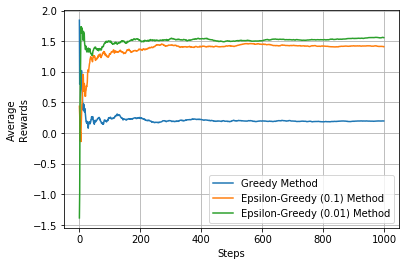

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, EPOCHS)
greedy_plot, = plt.plot(x,greedy_rewards[x])
epsilog_greedy, = plt.plot(x,epsilon_greedy_rewards[x])
epsilog_greedy_smaller, = plt.plot(x,epsilon_greedy_rewards_smaller[x])
plt.xlabel("Steps")
plt.ylabel("Average\nRewards")
plt.legend([greedy_plot,epsilog_greedy, epsilog_greedy_smaller],["Greedy Method", "Epsilon-Greedy (0.1) Method", "Epsilon-Greedy (0.01) Method"])
plt.grid()
plt.show()

In [7]:
# Averaging over a lot of Runs
import time

RUNS = 2000   # Following Sutton's example (stated under Figure 2.2)
EPOCHS = 1000 # Number of Epochs in every Run
greedy_rewards = np.zeros((RUNS, EPOCHS))                 # For a_greedy
epsilon_greedy_rewards = np.zeros((RUNS, EPOCHS))         # For a_epsilon
epsilon_greedy_rewards_smaller = np.zeros((RUNS, EPOCHS)) # For a_epsilon_smaller_e

stime = time.time()
for i in range(0, RUNS):
    a_greedy = Bandit_Agent()
    a_epsilon = Bandit_Agent()
    a_epsilon_smaller_e = Bandit_Agent()
    for j in range(0,EPOCHS):
        greedy_rewards[i, j] = a_greedy.greedy_update()
        epsilon_greedy_rewards[i, j] = a_epsilon.epsilon_greedy_update(epsilon=0.1)
        epsilon_greedy_rewards_smaller[i, j] = a_epsilon_smaller_e.epsilon_greedy_update(epsilon=0.01)
etime = time.time()
print("It took {} seconds to run this cell".format(etime - stime))

It took 71.96520400047302 seconds to run this cell


In [8]:
# Processing collected rewards for chart

greedy_rewards_mean = np.zeros(EPOCHS)
greedy_rewards_std = np.zeros(EPOCHS)

epsilon_greedy_rewards_mean = np.zeros(EPOCHS)
epsilon_greedy_rewards_std = np.zeros(EPOCHS)

epsilon_greedy_rewards_smaller_mean = np.zeros(EPOCHS)
epsilon_greedy_rewards_smaller_std = np.zeros(EPOCHS)


for ep in range(0,EPOCHS):
    greedy_rewards_mean[ep] = greedy_rewards[0:RUNS, ep].mean()
    greedy_rewards_std[ep] = greedy_rewards[0:RUNS, ep].std()

    epsilon_greedy_rewards_mean[ep] = epsilon_greedy_rewards[0:RUNS, ep].mean()
    epsilon_greedy_rewards_std[ep] = epsilon_greedy_rewards[0:RUNS, ep].std()

    epsilon_greedy_rewards_smaller_mean[ep] = epsilon_greedy_rewards_smaller[0:RUNS, ep].mean()
    epsilon_greedy_rewards_smaller_std[ep] = epsilon_greedy_rewards_smaller[0:RUNS, ep].std()

/home/fred/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


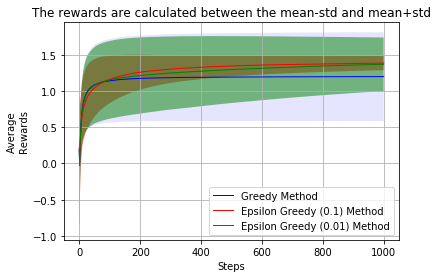

In [9]:
%matplotlib inline
# Charting them
x = np.arange(0, EPOCHS)
fig, ax = plt.subplots(1)
ax.plot(x, greedy_rewards_mean, lw=1, label='Greedy Method', color='blue', ls='-')
ax.fill_between(x, greedy_rewards_mean - greedy_rewards_std, # Lower bound
                greedy_rewards_mean + greedy_rewards_std, # Upper bound
                facecolor='blue', alpha=0.1)
ax.plot(x, epsilon_greedy_rewards_mean, lw=1, label='Epsilon Greedy (0.1) Method', color='red', ls='-')
ax.fill_between(x, epsilon_greedy_rewards_mean - epsilon_greedy_rewards_std, # Lower bound
                epsilon_greedy_rewards_mean + epsilon_greedy_rewards_std, # Upper bound
                facecolor='red', alpha=0.5)
ax.plot(x, epsilon_greedy_rewards_smaller_mean, lw=1, label='Epsilon Greedy (0.01) Method', color='green', ls='-')
ax.fill_between(x, epsilon_greedy_rewards_smaller_mean - epsilon_greedy_rewards_smaller_std, # Lower bound
                epsilon_greedy_rewards_smaller_mean + epsilon_greedy_rewards_smaller_std, # Upper bound
                facecolor='green', alpha=0.5)
ax.legend(loc='lower right')

ax.set_xlabel('Steps')
ax.set_ylabel('Average\nRewards')
ax.set_title("The rewards are calculated between the mean-std and mean+std")
ax.grid()
fig.show()